<Axes: >

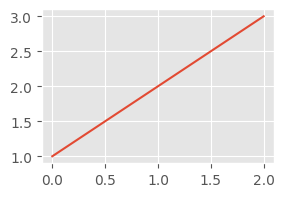

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))


# 데이터 불러오기

In [4]:
# df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')
df = pd.read_csv('../data/advertising.csv')

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 다중회귀

## 변수 선택
* 3가지 독립변수 모두 선택

In [5]:
# -----------------------------------
# 독립변수, 종속변수 선택
# -----------------------------------
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

<Axes: >

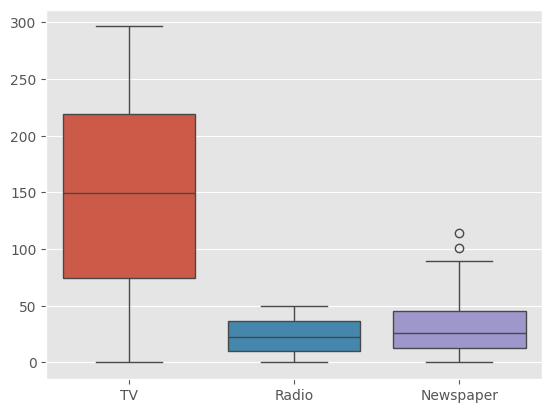

In [6]:
# -----------------------------------
# 독립변수, 종속변수 데이터 범위 파악
# -----------------------------------
sns.boxplot(X)


## 훈련세트 테스트세트 분할

In [7]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할
# ------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


## 스케일링

In [8]:
# ------------------------------------------
# 독립변수 스케일링
# ------------------------------------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # 훈련데이터는 fit_transform()
X_test_scaled = scaler.transform(X_test)        # 테스트데이터는 transform()

In [9]:
print(f'각 변수의 평균 {X_train_scaled[:,0].mean()}, {X_train_scaled[:,1].mean()}, {X_train_scaled[:,2].mean()}')
print(f'각 변수의 표준편차 :  {X_train_scaled[:,0].std()}, {X_train_scaled[:,1].std()}, {X_train_scaled[:,2].std()}')

각 변수의 평균 -3.019806626980426e-16, -2.3684757858670008e-17, 4.263256414560601e-16
각 변수의 표준편차 :  1.0, 1.0, 1.0


<Axes: >

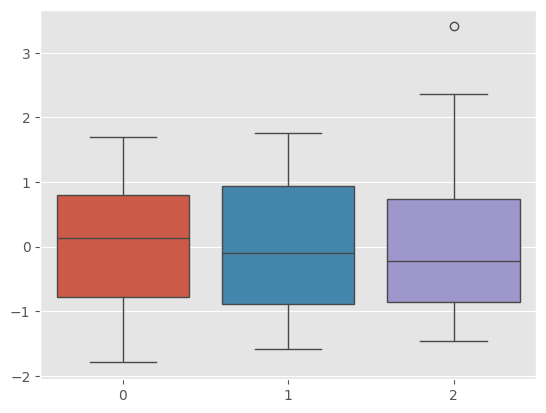

In [10]:
sns.boxplot(X_train_scaled)

## 모델 생성 및 훈련

In [11]:
# ------------------------------------------
# LinearRegression 클래스 import
# ------------------------------------------
from sklearn.linear_model import LinearRegression

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------
model = LinearRegression()

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------
model.fit(X_train_scaled, y_train)

LinearRegression()

## 평가

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
pred = model.predict(X_test_scaled)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('===다중회귀 모델의 평가결과===')
print(f'R2:{r2:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'MAE:{mae:.2f}')
print(f'MSE:{mse:.2f}')

===다중회귀 모델의 평가결과===
R2:0.91
RMSE:1.55
MAE:1.12
MSE:2.40


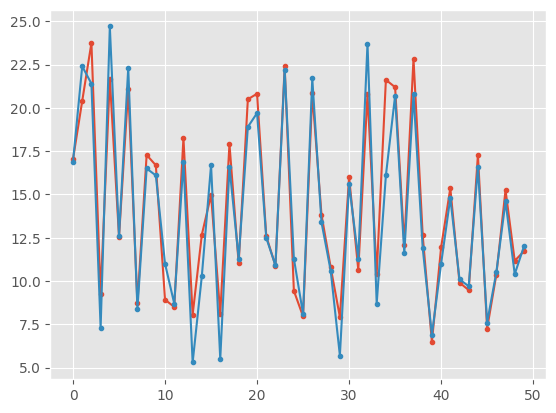

In [13]:
plt.plot(pred, marker='.', label='pred')
plt.plot(np.array(y_test), marker='.', label='pred')
pass

## 모델의 학습 결과

In [14]:
print(f'회귀계수:{model.coef_}')
print(f'절편:{model.intercept_}')

w1 = model.coef_[0]
w2 = model.coef_[1]
w3 = model.coef_[2]

b = model.intercept_

print(f'회귀식:{w1} * tv + {w2} * radio + {w3} * newspaper + {b}')

회귀계수:[4.63204383 1.48207916 0.0889496 ]
절편:15.570666666666671
회귀식:4.632043828977967 * tv + 1.4820791574834187 * radio + 0.0889495984853728 * newspaper + 15.570666666666671


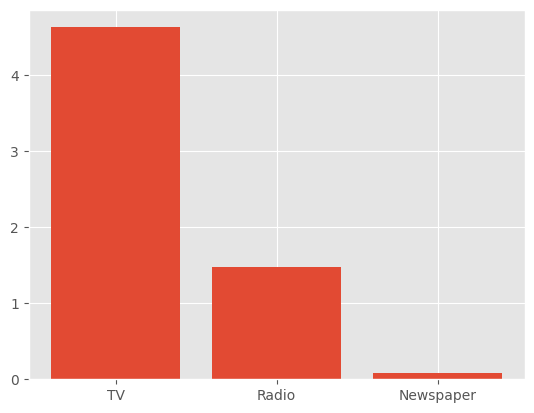

In [15]:
plt.bar(["TV","Radio","Newspaper"], model.coef_);

## 새로운 값 예측하기
* 스케일링 된 데이터로 훈련했으므로 예측할 데이터도 스케일링을 해주어야 한다.
* 훈련세트에서 사용한 스케일려를 이용하여 스케일링한다.
* 이 때는 fit 하지 않고 transform만 한다.

In [16]:
new_data = [[175,15,2]]
new_data_scaled = scaler.transform(new_data)
model.predict(new_data_scaled)

/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([15.80426509])

## 모델 저장 및 활용
* 스케일링을 하여 모델을 생성한 경우, 동일한 스케일링 방식을 저장하기 위해 스케일러도 저장해주어야 합니다.

#### 모델 및 스케일러 저장

In [ ]:
import joblib
joblib.dump(model, '../models/ad_lr_model.pkl')
joblib.dump(scaler, '../models/ad_scaler.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'model/ad_lr_model.pkl'

#### 모델 불러와 사용하기

In [ ]:
# ---------------------
# 모델 불러오기
# ---------------------
loaded_model = joblib.load('model/ad_lr_model.pkl')

# ---------------------
# 스케일러 불러오기
# ---------------------
loaded_scaler = joblib.load('model/ad_scaler.pkl')

# ------------------------------------
# 예측
# ------------------------------------
new_data = [[175,15,2]]
new_data_scaled = loaded_scaler.transform(new_data)
loaded_model.predict(new_data_scaled)

c:\Users\chopi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([15.80426509])